# Regularization과 Normalization
  - regularization과 normalization은 한국어로 번역할 때 두 개념다 정규화로 번역될 때가 많아서 혼란스러울 수 있다.
  - 하지만 두 개념은 서로 다른 개념이다.

## Regularization :  정칙화 / 규제

  - regularization은 정칙화라고 불리며 오버피팅을 해결하기 위한 방법 중 하나이다.
  - 대표적으로 L1, L2, Dropout, Batch normalization 등이 있다.
  - 오버피팅은 과적합이라고 하며 train set은 매우 잘 맞히지만 validation / test set은 틀리는 현상을 말한다.
  - 보통의 regularization 기법들이 모델이 train set의 정답을 못맞추도록 방해하는 역할을 한다.
  - 그래서 결과적으로 train loss는 약간 증가하지만 validation loss나 test loss를 감소시키는데 영향을 준다.

## Normalization : 정규화

  - 이는 데이터의 형태를 좀 더 의미있게, 혹은 트레이닝에 적합하게 전처리하는 과정을 의미한다.
  - 데이터를 z-score로 바꾸거나 minmax scaler를 사용해서 0과 1 사이의 값으로 분포를 조정하는 것들이 해당된다.
  - Normalization은 모든 피처의 범위 분포를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꿔주는 전처리 과정이다.

### Regularization과 Normalization의 간단한 예제

In [1]:
# Iris dataset의 회귀 문제

from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


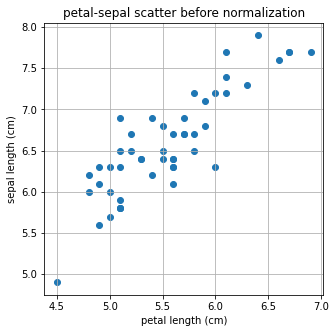

In [3]:
# 산점도를 통해서 확인하기

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

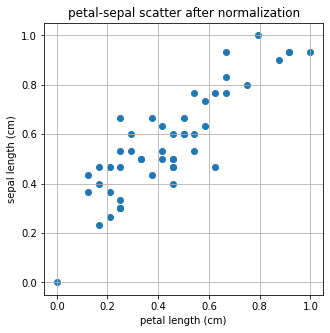

In [4]:
# 0-1로 normalization을 해주는 minmax_scale을 사용해서 산점도 그리기

from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

  - 데이터의 상대적인 분포는 바뀌지 않았지만 피처의 스케일이 0과 1사이로 변환되었다.

In [5]:
# Regularization

from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


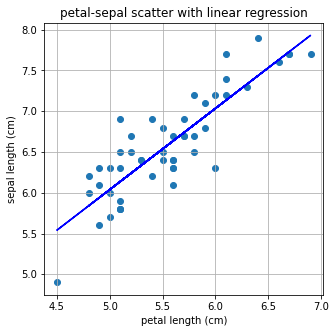

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


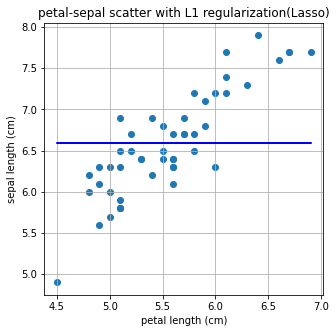

In [7]:
# L1 Regularization
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

  - 기울기가 0으로 나오기 때문에 Lasso 방법은 이 문제에 적합하지 않다.

기울기 : 0.93, 절편 : 1.41


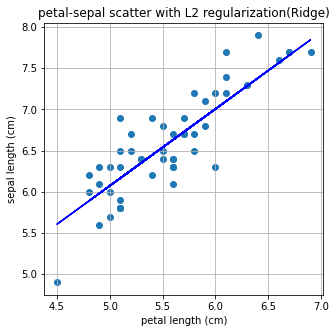

In [8]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## L1 Regularization

  - L1 regularization은 Lasso라고 불린다.
  - Lasso로는 위의 Regression 문제가 풀리지 않았다.
  - 그 이유는 L1 regularization은 X가 2차원 이상인 여러 칼럼 값이 있는 데이터일 때 실제 효과를 볼 수 있기 때문이다.

In [9]:
# 칼럼수가 많은 wind dataset을 사용
# 총 13개의 칼럼 값을 가짐

from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [10]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [13]:
# L1 regularization을 사용

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


  - Linear Regression을 사용한 경우 모든 칼럼의 가중치를 탐색하여 결과를 구한다.
  - L1 Regularization을 사용한 경우 총 13개 중 7개를 제외한 나머지의 값들이 0으로 변한다.
  - 칼럼의 가중치 중에서 영향을 미치지 못하는 값들을 0으로 만든것이다.
  - 그래서 L1 Regularization은 어떤 칼럼이 결과에 영향을 더 크게 미치는지 확인할 수 있도록 해주고 그것들을 반영해서 결과를 만들어낸다.

## L2 Regularization

  - L2 Regularization은 Ridge라고 불린다.
  - L2 Regularization은 L1과 다르게 영향을 많이 주지 않는 가중치를 0으로 만들지 않고 0에 가깝게 만들어서 결과를 만들어낸다.
  - 그리고 L1 Regularization보다 수렴 속도가 빠르다는 장점이 있다.

In [14]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


## Dropout

  - 드롭아웃(Dropout) 기법은 2014년도에 나온 논문이다.
  - 드롭아웃이 나오면서 확률적으로 랜덤하게 몇 가지의 뉴럴만 선택하여 정보를 전달할 수 있게 되었다.
  - 오버피팅을 막기 위해서 확률을 높여서 학습이 잘 되지 않도록 한다.
  - fully connected layer에서 Dropout layer를 추가하면 된다.

In [15]:
# 실습 - not overfittion

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [16]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4433 - accuracy: 0.4355
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2085 - accuracy: 0.5078
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1606 - accuracy: 0.5317
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1211 - accuracy: 0.5443
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1072 - accuracy: 0.5548


In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4996 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3763 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3385 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3101 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8915


  - 오버피팅이 되지 않은 데이터에 Dropout을 넣어주면 오히려 더 학습이 안되는 것을 확인할 수 있다.

In [19]:
# 실습 - overfitting
# 이번엔 임의적으로 train / valid = 99:1로 만들어서 overfitting 시킨 후 실습을 진행한다.

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.0530 - accuracy: 0.4646 - val_loss: 1.6494 - val_accuracy: 0.6317
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4168 - accuracy: 0.6135 - val_loss: 1.2006 - val_accuracy: 0.6733
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.6742 - val_loss: 0.9748 - val_accuracy: 0.7250
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9169 - accuracy: 0.7131 - val_loss: 0.8369 - val_accuracy: 0.7517
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8037 - accuracy: 0.7344 - val_loss: 0.7503 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.7468 - val_loss: 0.7003 - val_accuracy: 0.7617
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.7556 - val_loss: 0.6587 - val_accuracy: 0.7867

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8624 - val_loss: 0.3994 - val_accuracy: 0.8417
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8632 - val_loss: 0.3955 - val_accuracy: 0.8383
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8636 - val_loss: 0.3995 - val_accuracy: 0.8400
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8634 - val_loss: 0.3958 - val_accuracy: 0.8367
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8643 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8644 - val_loss: 0.3923 - val_accuracy: 0.8400
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8655 - val_loss: 0.3934 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8806 - val_loss: 0.3593 - val_accuracy: 0.8533
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8809 - val_loss: 0.3603 - val_accuracy: 0.8450
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8804 - val_loss: 0.3554 - val_accuracy: 0.8533
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8804 - val_loss: 0.3551 - val_accuracy: 0.8583
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8803 - val_loss: 0.3545 - val_accuracy: 0.8567
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8808 - val_loss: 0.3548 - val_accuracy: 0.8600
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8820 - val_loss: 0.3567 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.8916 - val_loss: 0.3378 - val_accuracy: 0.8700
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8926 - val_loss: 0.3412 - val_accuracy: 0.8667
Epoch 173/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.8919 - val_loss: 0.3372 - val_accuracy: 0.8717
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8928 - val_loss: 0.3321 - val_accuracy: 0.8700
Epoch 175/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8925 - val_loss: 0.3402 - val_accuracy: 0.8667
Epoch 176/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8917 - val_loss: 0.3335 - val_accuracy: 0.8617
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8935 - val_loss: 0.3393 - val_accuracy: 0.8683

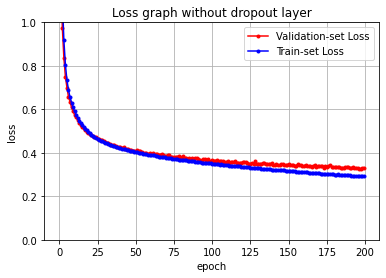

In [20]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

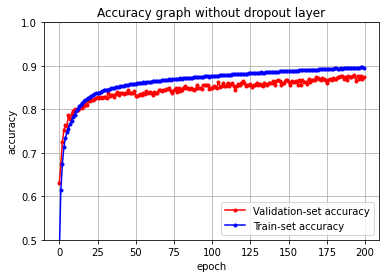

In [21]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

  - Dropout이 없는 fully connected layer에서 200번 훈련을 진행한 결과 train set의 accuracy는 올라가고 loss는 점점 떨어졌다.
  - 하지만 validation set의 accuracy와 loss값은 어느 정도에서 수렴함을 볼 수 있다.

In [22]:
# Dropout layer 추가

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.0887 - accuracy: 0.4755 - val_loss: 1.7212 - val_accuracy: 0.5667
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.5028 - accuracy: 0.5405 - val_loss: 1.2613 - val_accuracy: 0.6433
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.2008 - accuracy: 0.5997 - val_loss: 1.0485 - val_accuracy: 0.6850
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0345 - accuracy: 0.6507 - val_loss: 0.9119 - val_accuracy: 0.7300
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9248 - accuracy: 0.6855 - val_loss: 0.8186 - val_accuracy: 0.7500
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.7064 - val_loss: 0.7563 - val_accuracy: 0.7650
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7965 - accuracy: 0.7196 - val_loss: 0.7130 - val_accuracy: 0.7717

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8490 - val_loss: 0.4040 - val_accuracy: 0.8400
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8479 - val_loss: 0.4041 - val_accuracy: 0.8367
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8482 - val_loss: 0.4056 - val_accuracy: 0.8400
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8493 - val_loss: 0.4024 - val_accuracy: 0.8417
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8495 - val_loss: 0.3983 - val_accuracy: 0.8400
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8507 - val_loss: 0.3987 - val_accuracy: 0.8433
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8500 - val_loss: 0.3988 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8689 - val_loss: 0.3544 - val_accuracy: 0.8567
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.8695 - val_loss: 0.3552 - val_accuracy: 0.8550
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8707 - val_loss: 0.3555 - val_accuracy: 0.8600
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8703 - val_loss: 0.3512 - val_accuracy: 0.8600
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3696 - accuracy: 0.8697 - val_loss: 0.3529 - val_accuracy: 0.8600
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8720 - val_loss: 0.3501 - val_accuracy: 0.8600
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8709 - val_loss: 0.3497 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8797 - val_loss: 0.3327 - val_accuracy: 0.8717
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8823 - val_loss: 0.3276 - val_accuracy: 0.8733
Epoch 173/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8811 - val_loss: 0.3318 - val_accuracy: 0.8700
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8806 - val_loss: 0.3291 - val_accuracy: 0.8750
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8821 - val_loss: 0.3306 - val_accuracy: 0.8700
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8819 - val_loss: 0.3326 - val_accuracy: 0.8717
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8825 - val_loss: 0.3305 - val_accuracy: 0.8733

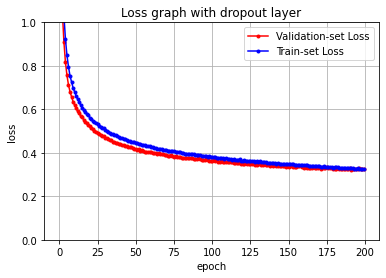

In [23]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

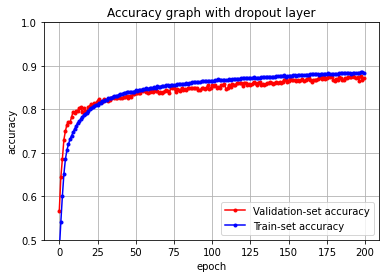

In [24]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

  - Dropout layer를 추가함으로서 두 데이터셋이 비슷하게 결과를 내는 것을 확인할 수 있다.

## Batch Normalization

  - Batch Normalization은 gradient vanishing, explode 문제를 해결하는 방법이다.
  - gradient vanishing과 explode는 normalize 과정에서 가중치가 사라지거나 폭등하는 것을 의미한다.
  - 아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 것에서 중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이이다.

In [25]:
# 실습

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [26]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [27]:
# train / valid 를 7:3으로 분리하고 Dense layer를 쌓는다.

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 27ms/step - loss: 1.2032 - accuracy: 0.6178 - val_loss: 0.7437 - val_accuracy: 0.7359
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.6557 - accuracy: 0.7748 - val_loss: 0.5989 - val_accuracy: 0.7994
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5574 - accuracy: 0.8111 - val_loss: 0.5335 - val_accuracy: 0.8221
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5078 - accuracy: 0.8288 - val_loss: 0.4977 - val_accuracy: 0.8336
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4812 - accuracy: 0.8372 - val_loss: 0.4829 - val_accuracy: 0.8366
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4574 - accuracy: 0.8449 - val_loss: 0.4623 - val_accuracy: 0.8409
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4398 - accuracy: 0.8506 - val_loss: 0.4445 - val_accuracy: 0.8480
Epoch 8/20
21/21 [=

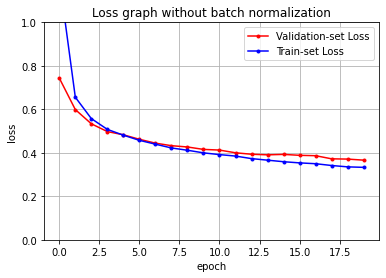

In [28]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

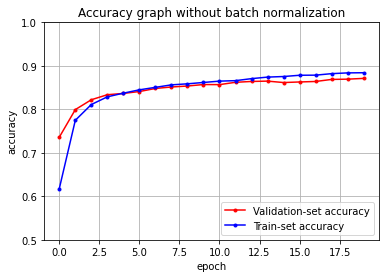

In [29]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [30]:
# 이번에는 Batch Normalization layer를 추가해서 진행한다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 18ms/step - loss: 0.9543 - accuracy: 0.6753 - val_loss: 1.0958 - val_accuracy: 0.6844
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5247 - accuracy: 0.8213 - val_loss: 0.8703 - val_accuracy: 0.7692
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4529 - accuracy: 0.8465 - val_loss: 0.7411 - val_accuracy: 0.8134
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4136 - accuracy: 0.8580 - val_loss: 0.6792 - val_accuracy: 0.8258
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3861 - accuracy: 0.8660 - val_loss: 0.6355 - val_accuracy: 0.8363
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3625 - accuracy: 0.8741 - val_loss: 0.5772 - val_accuracy: 0.8506
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3463 - accuracy: 0.8795 - val_loss: 0.5628 - val_accuracy: 0.8423
Epoch 8/20
21/21 [=

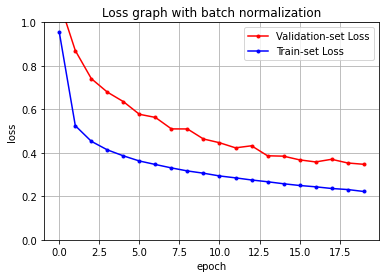

In [31]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

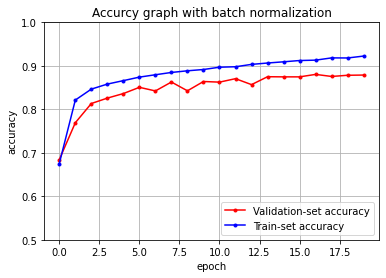

In [32]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

  - 기존의 fully connected layer로 빠른 속도를 보여주지만 Batch Normalization을 추가하니까 좀 더 빠르게 정확도 상승이 있고 loss 함수의 감소도 좀 더 빨라짐을 확인할 수 있다.
  - 즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지게 된다.